In [22]:
import pandas as pd
df= pd.read_csv("/content/emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [23]:
df.shape

(16000, 2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [25]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


<Axes: ylabel='count'>

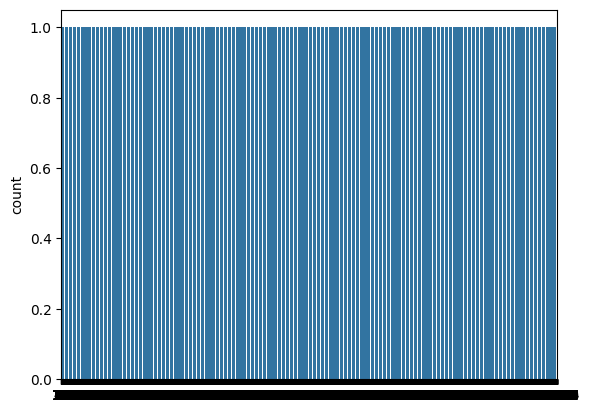

In [26]:
import seaborn as sns
sns.countplot(x=df.label)

In [27]:
df.isna().sum()

,0
text,0
label,0


In [29]:
df['text']=df['text'].apply(lambda x:"".join(x.lower() for x in x.split()))

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['text']=df['text'].apply(lambda x:"".join(x for x in x.split() if x not in stop))

In [36]:
pip install textblob

In [43]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text']=df['text'].apply(lambda x:"".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

,text
0,ididntfeelhumiliated
1,icangofromfeelingsohopelesstosodamnedhopefulju...
2,imgrabbingaminutetopostifeelgreedywrong
3,iameverfeelingnostalgicaboutthefireplaceiwillk...
4,iamfeelinggrouchy


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['text'])
x=x.toarray()
y=df.label.values

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, \shuffle=True)

In [53]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,pred)*100,"%")

Accuracy: 3.4687500000000004 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
pred_rf=clf_rf.predict(x_test).astype(int)

In [ ]:
print("Accuracy",accuracy_score(y_test,pred_rf))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)
pred_lr=clf_lr.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))